In [39]:
import numpy as np
def main():
    matrix = np.random.random((10,3))
    print(matrix,"\n",np.array([min(matrix[i], key = lambda x: abs(x-0.5)) for i in range(0,10)]).reshape(10,1))
if __name__ == "__main__":
    main()

[[0.12667388 0.09420128 0.79359166]
 [0.75520576 0.45899818 0.23759698]
 [0.62254853 0.11086393 0.65482666]
 [0.17137137 0.69628187 0.59123704]
 [0.47048271 0.65257505 0.8395749 ]
 [0.52666458 0.51334489 0.3487833 ]
 [0.87578891 0.40634248 0.64705539]
 [0.92664653 0.47032332 0.72285703]
 [0.04078778 0.67584671 0.46989359]
 [0.0696741  0.74335464 0.90766295]] 
 [[0.79359166]
 [0.45899818]
 [0.62254853]
 [0.59123704]
 [0.47048271]
 [0.51334489]
 [0.40634248]
 [0.47032332]
 [0.46989359]
 [0.74335464]]


In [40]:
import numpy as np
def main():
    matrix = np.random.random((6,6))
    print(matrix,"\n",np.array([sum(matrix[i])/min(matrix.transpose()[i]) for i in range(0,6)]).reshape(6,1))
if __name__ == "__main__":
    main()

[[0.39514284 0.94526172 0.99786155 0.64189129 0.34485408 0.14232792]
 [0.41420803 0.1372365  0.89489951 0.16118503 0.82974679 0.46883012]
 [0.68787623 0.69051102 0.58955885 0.3564863  0.69673912 0.80147917]
 [0.72461681 0.60418583 0.23505182 0.49243795 0.07482033 0.58628649]
 [0.16185915 0.72472358 0.40888699 0.06300406 0.1681503  0.58547259]
 [0.10519901 0.80885366 0.60179234 0.49992151 0.45869361 0.86948983]] 
 [[32.95981037]
 [21.1758969 ]
 [16.26301246]
 [43.1305438 ]
 [28.22891411]
 [23.49468654]]


In [41]:
import numpy as np
def main():
    x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
    print(max([x[i] for i in range(1,len(x)) if x[i-1] == 0]))
if __name__ == "__main__":
    main()

5


In [42]:
import numpy as np
def main():
    x = np.ones(10)
    i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
    print(np.array([x[j] + i.tolist().count(j) for j in range(0,len(i))]))
if __name__ == "__main__":
    main()

[2. 2. 2. 2. 1. 4. 1. 1.]


In [43]:
import numpy as np
def main():
    a = np.arange(16).reshape(4, 4)
    print({i:np.array([a[j][::-1] for j in range(4)]).diagonal(3-i).tolist() for i in range(7)})
if __name__ == "__main__":
    main()

{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


Input number of centroids: 5
Input number of points that we want to classify: 3000

Distortion: 1271.6405276660796


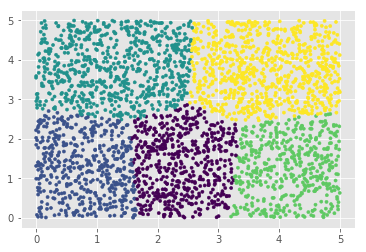

In [38]:
import numpy as np
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt
def _kmeans(obs, k):
    centroids = np.random.rand(k,2) * k
    n = obs.shape[0];
    y_old = []
    distortion = 0
    centroids = whiten(centroids)
    while True:
        x = np.array([[np.linalg.norm(obs[j]-centroids[i]) for i in range(k)] for j in range(n)]).reshape(n,k)
        y = np.array([x[i].argmin() for i in range(n)]).reshape(n,1)
        if (np.array_equal(y, y_old)):
            break
        z1 = np.array([np.mean([obs[i][0] for i in range(n) if y[i] == j] + [centroids[j][0]]) for j in range(k)]).reshape(k,1)
        z2 = np.array([np.mean([obs[i][1] for i in range(n) if y[i] == j] + [centroids[j][1]]) for j in range(k)]).reshape(k,1)
        centroids = np.array([[z1[i],z2[i]] for i in range(k)]).reshape(k,2)
        y_old = y
    for i in range(k):
        for j in range(n):
            if y[j] == i:
                distortion += pow(np.linalg.norm(obs[j] - centroids[i]),2)
    return [y[:,0], distortion]
def main():
    k = int(input("Input number of centroids: "))
    n = int(input("Input number of points that we want to classify: "))
    obs = np.random.rand(n,2) * k
    [y, distortion] = _kmeans(whiten(obs), k)
    print("\nDistortion:", distortion)
    plt.scatter(*obs.T, c = y, s=10)
    plt.show()
if __name__ == "__main__":
    main()